# 2-6. Python基本的パッケージの使い方課題

## 課題 その1
```
アヤメデータセットを用いて3種類のアヤメにどのような差が見られるかを分析し、差が見られる場合はどのような差があるか人に伝えられるように可視化してください。
```

In [1]:
# データセットを読み込み
#   https://carp.cc.it-hiroshima.ac.jp/~tateyama/Lecture/AppEx/IrisData.jpg
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
# データフレームとして表示
import pandas as pd
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [3]:
# groupbyによる平均値比較
iris_df['target'] = iris.target

In [4]:
# それぞれの平均を求める
iris_df.groupby('target').mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
0,5.006,3.418,1.464,0.244
1,5.936,2.770,4.260,1.326
2,6.588,2.974,5.552,2.026


## 課題 その1 解答例

In [5]:
# groupbyによる平均値比較
iris_df['target'] = iris.target
iris_df.groupby('target').mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
0,5.006,3.418,1.464,0.244
1,5.936,2.770,4.260,1.326
2,6.588,2.974,5.552,2.026


In [6]:
# 可視化
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

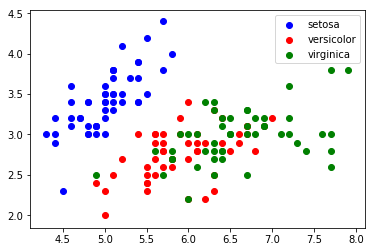

In [7]:
# 色を指定
color_map = ['b', 'r', 'g']

for target, target_name in enumerate(iris.target_names):
    target_iris_df = iris_df[iris_df.target == target]
    plt.scatter(
        target_iris_df['sepal length (cm)'], 
        target_iris_df['sepal width (cm)'], 
        label=target_name, 
        c=color_map[target])
plt.legend()

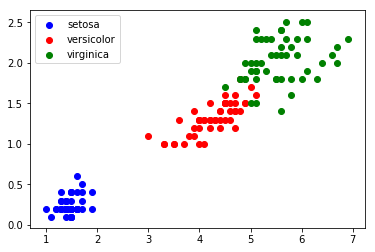

In [8]:
for target, target_name in enumerate(iris.target_names):
    target_iris_df = iris_df[iris_df.target == target]
    plt.scatter(
        target_iris_df['petal length (cm)'], 
        target_iris_df['petal width (cm)'], 
        label=target_name, 
        c=color_map[target])
plt.legend()

## 課題 その2
```
ワインデータセットを用いて3種類のワインにどのような差が見られるかを分析し、差が見られる場合はどのような差があるか人に伝えられるように可視化してください。
```

### ワインデータ
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine

### ワインデータの中身
1. alcohol アルコール濃度
2. malic_acid リンゴ酸
3. ash 灰
4. alcalinity_of_ash 灰のアルカリ成分
5. magnesium マグネシウム
6. total_phenols 総フェノール類量
7. flavanoids フラボノイド（ポリフェノール）
8. nonflavanoid_phenols 非フラボノイドフェノール類
9. proanthocyanins プロアントシアニジン（ポリフェノールの一種）
10. color_intensity 色の強さ
11. hue 色合い
12. od280/od315_of_diluted_wines ワインの希釈度合い
13. proline プロリン（アミノ酸の一種）


In [9]:
# データセットを読み込み
from sklearn.datasets import load_wine
wine = load_wine()

import pandas as pd
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)

In [10]:
# groupbyでそれぞれの差分を確認する
wine_df['target'] = wine.target

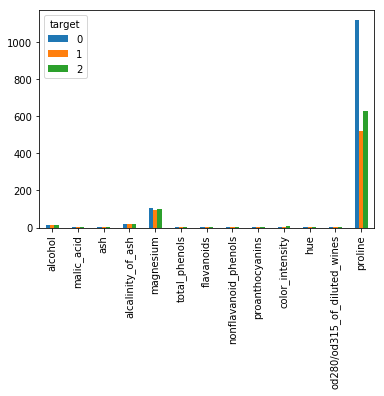

In [11]:
# 可視化する
wine_df.groupby('target').mean().T.plot(kind='bar')

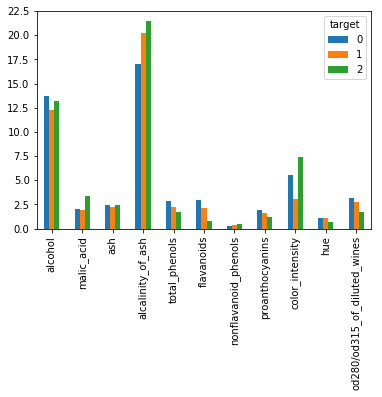

In [12]:
# 上記可視化で差がありそうなものを選択
wine_df[['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'target']].groupby('target').mean().T.plot(kind='bar')

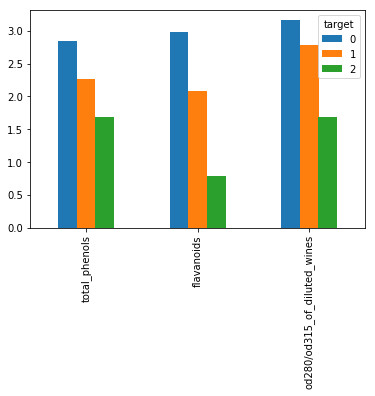

In [13]:
# 特に差分が大きいものをさらに選択
wine_df[['total_phenols', 'flavanoids',
        'od280/od315_of_diluted_wines', 'target']].groupby('target').mean().T.plot(kind='bar')

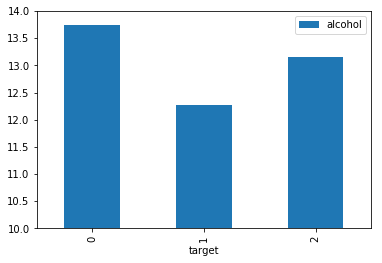

In [14]:
# 解釈可能な特徴量（アルコール度数）で可視化する
wine_df[['alcohol', 'target']].groupby('target').mean().plot(kind='bar', ylim=[10, 14])